## Чтение генома из файла

In [15]:
# Читаем файл
with open("e-coli_genome.fna", 'r') as f:
    file = f.read()

file[:100]

'>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome\nAGCTTTTCATTCTGACTGCAACGGGCAA'

In [16]:
# Уберём первую строчку
file.find('\n')
genome = file[72:]
genome[:100]

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTG\nGTTACCTGCCGTGAGTAAA'

In [18]:
genome = genome.replace('\n', '')
genome[:100]

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAAT'

## Поиск ориджина репликации e-coli

### Посмотрим на частоты нуклеотидов в разных регионах генома

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [148]:
counts = {key: [] for key in ['A', 'C', 'T', 'G']}
N = len(genome)
step = N // 46

for i in range(45):
    for key in counts.keys():
        nuc_count = genome[step * i: step * (i + 1)].count(key)
        counts[key].append(nuc_count)

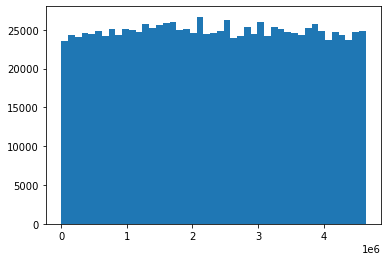

In [161]:
bins = np.linspace(1, N, 46)
plt.hist(x=bins[:-1], bins=bins, weights=counts['A']);

In [150]:
percents = {key: np.array(value) / step for key, value in counts.items()}

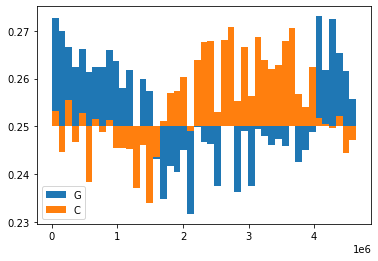

In [163]:
bins = np.linspace(1, N, 46)
plt.hist(x=bins[:-1], bins=bins, weights=percents['G'] - 0.25, label='G', bottom=0.25)
plt.hist(x=bins[:-1], bins=bins, weights=percents['C'] - 0.25, label='C', bottom=0.25)
plt.legend()

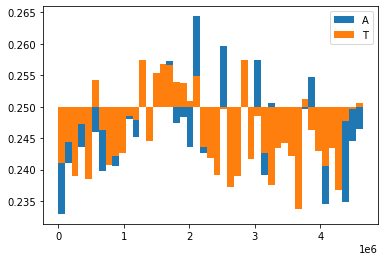

In [162]:
plt.hist(x=bins[:-1], bins=bins, weights=percents['A'] - 0.25, label='A', bottom=0.25)
plt.hist(x=bins[:-1], bins=bins, weights=percents['T'] - 0.25, label='T', bottom=0.25)
plt.legend()

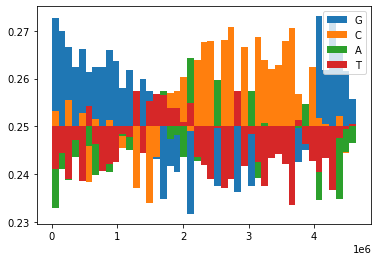

In [164]:
bins = np.linspace(1, N, 46)
plt.hist(x=bins[:-1], bins=bins, weights=percents['G'] - 0.25, label='G', bottom=0.25)
plt.hist(x=bins[:-1], bins=bins, weights=percents['C'] - 0.25, label='C', bottom=0.25)
plt.hist(x=bins[:-1], bins=bins, weights=percents['A'] - 0.25, label='A', bottom=0.25)
plt.hist(x=bins[:-1], bins=bins, weights=percents['T'] - 0.25, label='T', bottom=0.25)
plt.legend()

### GC-content Skew

In [165]:
skew = [0]
for i in range(N):
    if genome[i] == 'G':
        skew.append(skew[i] + 1)
    elif genome[i] == 'C':
        skew.append(skew[i] - 1)
    else:
        skew.append(skew[i])

position of minimum skew: 3925597


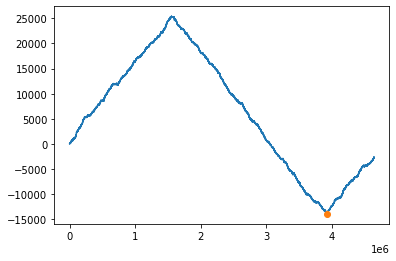

In [174]:
plt.plot(range(len(skew)), skew)
plt.plot(skew.index(min(skew)), min(skew), 'o')
print(f'position of minimum skew: {skew.index(min(skew))}')

## Salmonela

In [193]:
# Сделаем функцию для форматирования файла
def genome_from_fna(file_name):
    with open(file_name, 'r') as f:
        file = f.read()
    end_of_capt = file.find('\n')
    genome = file[end_of_capt + 1:].replace('\n', '')
    return genome

In [197]:
genome = genome_from_fna('salmonela.fna')
genome[:100]

'AGAGATTACGTCTGGTTGCAAGAGATCATGACAGGGGGAATTGGTTGAAAATAAATATATCGCCAGCAGCACATGAACAAGTTTCGGAATGTGATCAATT'

In [195]:
# Сделаем функцию для поиска skew и его минимума

def calculate_skew(genome):
    """
    TODO: Добавить документацию и аннотацию типов
    :param genome:
    :return:
    """
    skew = [0]
    for i in range(len(genome)):
        if genome[i] == 'G':
            skew.append(skew[i] + 1)
        elif genome[i] == 'C':
            skew.append(skew[i] - 1)
        else:
            skew.append(skew[i])
    return skew, skew.index(min(skew))

position of minimum skew: 4084377


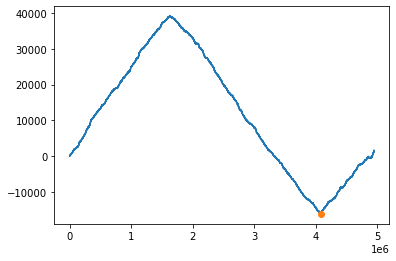

In [196]:
skew, min_pos = calculate_skew(genome)
plt.plot(range(len(skew)), skew)
plt.plot(min_pos, skew[min_pos], 'o')
print(f'position of minimum skew: {min_pos}')

## Thermotoga

In [198]:
genome = genome_from_fna('thermotoga.fna')
genome[:100]

'AGTTGGACGAAGGTTCTGATCCCTACAGAACACCTGCCCTGAAATGGTCCCTCAGGAGAATCATCGAGGAGTTAACCGCTCAGGGCTCTTTTTGAAATCT'

position of minimum skew: 787199


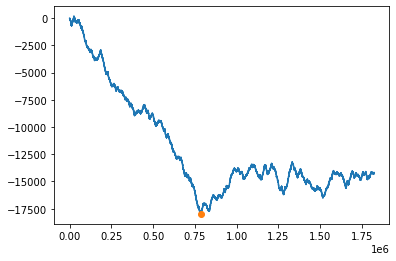

In [199]:
skew, min_pos = calculate_skew(genome)
plt.plot(range(len(skew)), skew)
plt.plot(min_pos, skew[min_pos], 'o')
print(f'position of minimum skew: {min_pos}')